In [23]:
%matplotlib inline

In [24]:
import sys
sys.dont_write_bytecode = True
import seaborn as sns
sns.set(style="whitegrid", color_codes=True, font_scale=1.2)
from ggplot import *
from dataMethods import *
import pandas as pd

In [25]:
import os
from os.path import expanduser

In [26]:
homeDirectory = expanduser("~")
dataDirectory = homeDirectory + os.sep + 'Google Drive/tACS_VWM_ALPHA/data/stim1/'

In [27]:
dataSheets = [dataDirectory + 's1/runData/run3_2016_Jul_21_1044.csv']

In [28]:
conds = OrderedDict([('t2d0', (2, 0)), ('t2d2', (2, 2)), ('t2d4', (2, 4)), ('t4d0', (4, 0)), ('t4d2', (4, 2)), ('t4d4', (4, 4))])

In [29]:
hemiConds = OrderedDict([('t1d0', (1, 0)), ('t1d1', (1, 1)), ('t1d2', (1, 2)), ('t2d0', (2, 0)), ('t2d1', (2, 1)), ('t2d2', (2, 2))])

In [30]:
testRuns = [(1,3)]

In [31]:
dataIndeces = []
for run in testRuns:
    for key in conds:
        dataIndeces.append(str(run)+key)

dataColumns = ['K', 'hitRate', 'faRate', 'RT', 'dPrime']

In [32]:
data = pd.DataFrame()
i = 0
for sheet in dataSheets:
    kVals = pashlerK(sheet)['Kvals']
    hitRates = pashlerK(sheet)['hitRates']
    faRates = pashlerK(sheet)['fAlarmRates']
    rtRates = rtCalc(sheet)
    dpVals = dprime(sheet)
    for key in conds:
        row = pd.Series([kVals[key],hitRates[key],faRates[key],rtRates[key],dpVals[key]],name=dataIndeces[i], index=dataColumns)
        row['targs'] = str(conds[key][0])
        row['dists'] = str(conds[key][1])
        data = data.append(row)
        i += 1

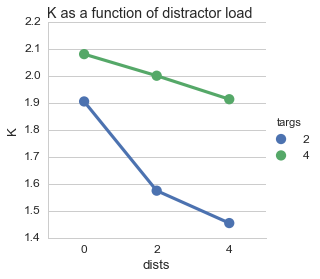

In [33]:
kGraph = sns.factorplot(data=data,x='dists',y='K',hue='targs')
kGraph.fig.suptitle('K as a function of distractor load')

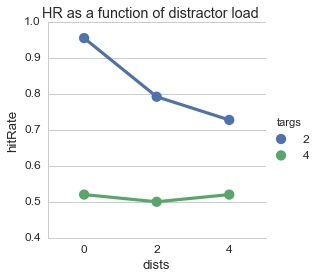

In [34]:
hitGraph = sns.factorplot(data=data,x='dists',y='hitRate',hue='targs')
hitGraph.fig.suptitle('HR as a function of distractor load')

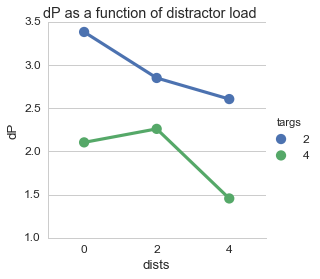

In [35]:
dprimeGraph = sns.factorplot(data=data,x='dists',y='dPrime',hue='targs')
dprimeGraph.fig.suptitle('dP as a function of distractor load')
dprimeGraph.set_axis_labels('dists', 'dP')

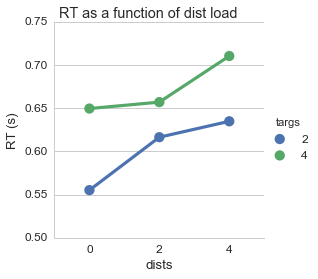

In [36]:
rtGraph = sns.factorplot(data=data,x='dists',y='RT',hue='targs')
rtGraph.set_axis_labels('dists', 'RT (s)')
rtGraph.fig.suptitle('RT as a function of dist load')

In [37]:
hemDataIndeces = []
for run in testRuns:
    for key in hemiConds:
        hemDataIndeces.append(str(run)+key)

hemDataColumns = ['leftHitRate','rightHitRate','leftdPrime','rightdPrime']

In [38]:
hemData = pd.DataFrame()
j = 0
for sheet in dataSheets:
    leftHits = hemHitRates(sheet, 'left')
    rightHits = hemHitRates(sheet, 'right')
    leftdPrimes = hemdPrime(sheet, 'left')
    rightdPrimes = hemdPrime(sheet, 'right')
    for key in hemiConds:
        row = pd.Series([leftHits[key],rightHits[key],leftdPrimes[key],rightdPrimes[key]],name=hemDataIndeces[j], index=hemDataColumns)
        row['targs'] = str(hemiConds[key][0])
        row['dists'] = str(hemiConds[key][1])
        hemData = hemData.append(row)
        j += 1

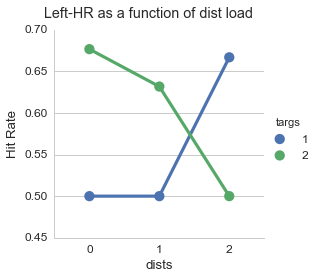

In [49]:
leftHitGraph = sns.factorplot(data=hemData,x='dists',y='leftHitRate',hue='targs')
leftHitGraph.set_axis_labels('dists', 'Hit Rate')
leftHitGraph.fig.suptitle('Left-HR as a function of dist load')
leftHitGraph.fig.subplots_adjust(top=.9)

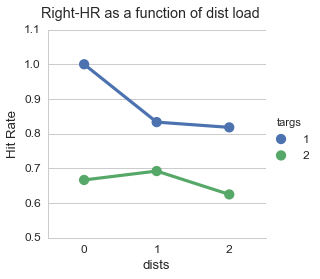

In [50]:
rightHitGraph = sns.factorplot(data=hemData,x='dists',y='rightHitRate',hue='targs')
rightHitGraph.set_axis_labels('dists', 'Hit Rate')
rightHitGraph.fig.suptitle('Right-HR as a function of dist load')
rightHitGraph.fig.subplots_adjust(top=.9)

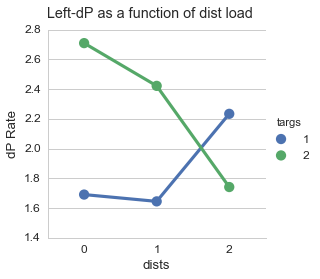

In [47]:
leftdPGraph = sns.factorplot(data=hemData,x='dists',y='leftdPrime',hue='targs')
leftdPGraph.set_axis_labels('dists', 'dP Rate')
leftdPGraph.fig.suptitle('Left-dP as a function of dist load')
leftdPGraph.fig.subplots_adjust(top=.9)

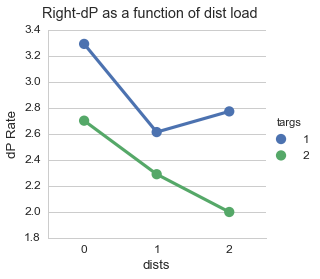

In [46]:
rightdPGraph = sns.factorplot(data=hemData,x='dists',y='rightdPrime',hue='targs')
rightdPGraph.set_axis_labels('dists', 'dP Rate')
rightdPGraph.fig.suptitle('Right-dP as a function of dist load')
rightdPGraph.fig.subplots_adjust(top=.9)

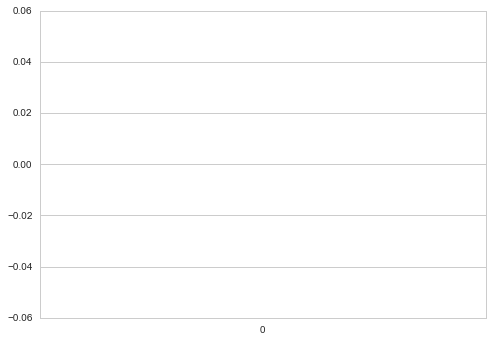

In [54]:
sns.stripplot()